# NUSTAR SCIENTIFIC PRODUCTS EXTRACTION

This notebook contains the set of cells which extract the NUSTAR scientific products from the raw data and prepares the data for further analysis ( phase-resolved  spectroscopy).

First, import necessary classes and functions from `nustar_scripts` folder in the root

In [1]:
import sys
sys.path.append('../')
from nustar_scripts.nu_class import np, plt, os, glob, NustarObservation, scan_phase_resolved_products
import matplotlib
%matplotlib inline
from nustar_scripts.pulsar_init import Nu_path, ObsList_bright, ObsList, periods_val

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
print(ObsList)

['90302319002', '90302319004', '90302319006', '90302319008', '90401308002', '90401334002', '90501310002']


## Choose the  ObsID you want to work with 

by setting ``` ObsID=ObsList[<index>] ```  or by  setting it by  your value, e.g.   ```ObsID = '90201041002'```

***I  advice that you create a seperate notebook for each ObsID (by copying this one), so that you can check for  errors or rerun the analysis if necessary for separate observations.***

Set the value for period in phase-resolved spectroscopy and the number of phase-bins.

Also we need to define the folder which is used for GTI (good time intervals) creation  based on barycentrically corrected lightcurves.

In [9]:
ObsID =  ObsList[1] 
nu_obs = NustarObservation(ObsID, nu_path=Nu_path)
period = periods_val[ObsID]
n_bins = 10
print(f"ObsID: {ObsID}; period: {period}; n_bins: {n_bins}")

prodpath_ave = 'spe_and_lc' #from light curves in this folder we will make GTIs

prodpath_ph_res = 'phase_resolved'  #folder name for phase resolved products


try:
    os.chdir(prodpath_ph_res)
except:
    os.chdir(prodpath_ave)

###
Observation 90302319004 loaded successfully
ObsID: 90302319004; period: 9.84435; n_bins: 10


------

## phase-resolved scientific products extraction
extracts spectra and light curves from both modules in each phase bin. 



### GTI creation 

1. Run the cell and then follow instructions one cell below. It would produce GTI intervals for phase-resolved products and the commands for `nuprooducts`.
2. Check for the produced plot which i) plots the phase of a time bin as a function of time and ii) plots the lightcurve with colors indicating the phase of the time bin. All times are in original time value of a light curve (i.e. withut barycentric and/or orbital corrections). The former plot should look like a saw, and the latter should look like a pulse profile with the phase of the time bin indicated by the color.

GTIs have been created for module(s) AB with period 9.84435 and 10 bins


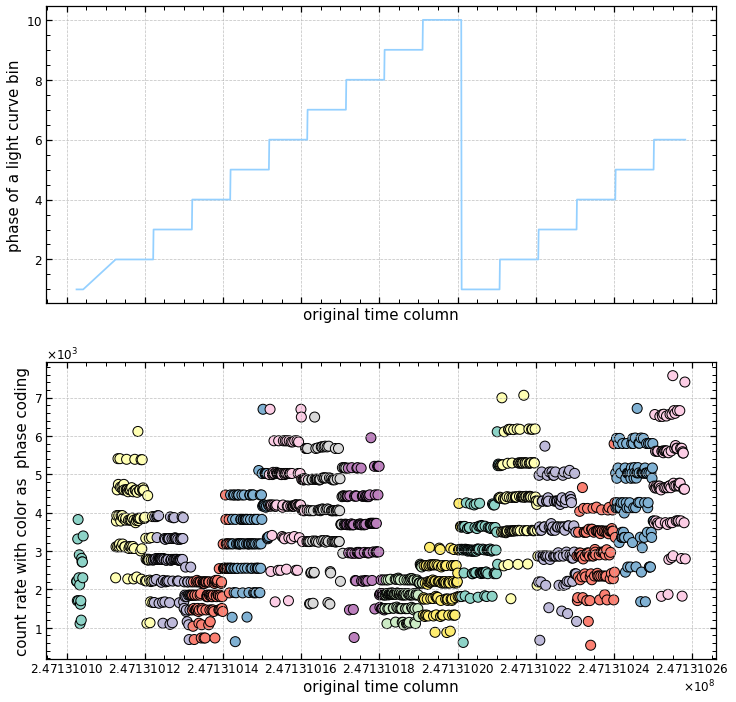

In [10]:
nu_obs.make_gti_from_lc(prodpath=prodpath_ave, mode='AB', period=period, phase_bins=n_bins, outfolder = 'gtis/' )



### Phase-resolved products
1. Run the following cell to create a script which extracts the phase-resolved (per phase bin) products from the raw data.


In [11]:

for mode in ['A','B']:
    nu_obs.phase_resolved_spectra(gtipath=prodpath_ave+'/gtis', mode=mode, folder='phase_resolved');

os.chdir(prodpath_ph_res)


start  phase resolved spectra scripts
Writing to file:  phase_resolvedA.sh
Writing to file:  phase_resolvedA.sh
Writing to file:  phase_resolvedA.sh
Writing to file:  phase_resolvedA.sh
Writing to file:  phase_resolvedA.sh
Writing to file:  phase_resolvedA.sh
Writing to file:  phase_resolvedA.sh
Writing to file:  phase_resolvedA.sh
Writing to file:  phase_resolvedA.sh
Writing to file:  phase_resolvedA.sh
done with phase resolved spectra scripts
start  phase resolved spectra scripts
Writing to file:  phase_resolvedB.sh
Writing to file:  phase_resolvedB.sh
Writing to file:  phase_resolvedB.sh
Writing to file:  phase_resolvedB.sh
Writing to file:  phase_resolvedB.sh
Writing to file:  phase_resolvedB.sh
Writing to file:  phase_resolvedB.sh
Writing to file:  phase_resolvedB.sh
Writing to file:  phase_resolvedB.sh
Writing to file:  phase_resolvedB.sh
done with phase resolved spectra scripts


2. Go to `out{ObsID}/products/` and run the scripts `phase_resolvedA.sh` and `phase_resolvedB.sh`. Running those sripts may take some time.

Check the terminal window for errors. If necessary, rerun the script for problematicc bins.

#### Average all lightcurves for each bin and barycenter


 1. Run this fucntion make a list of products filenames, such as the names of spectral files of each phase, light curves of each phase, etc

In [12]:

lclist, lclist_bary, spelist, propname_per_bin = scan_phase_resolved_products(prodpath=prodpath_ph_res, n_phase = 10)
print(lclist)

[['phase_resolved_bin1A_sr.lc', 'phase_resolved_bin1B_sr.lc'], ['phase_resolved_bin2A_sr.lc', 'phase_resolved_bin2B_sr.lc'], ['phase_resolved_bin3A_sr.lc', 'phase_resolved_bin3B_sr.lc'], ['phase_resolved_bin4A_sr.lc', 'phase_resolved_bin4B_sr.lc'], ['phase_resolved_bin5A_sr.lc', 'phase_resolved_bin5B_sr.lc'], ['phase_resolved_bin6A_sr.lc', 'phase_resolved_bin6B_sr.lc'], ['phase_resolved_bin7A_sr.lc', 'phase_resolved_bin7B_sr.lc'], ['phase_resolved_bin8A_sr.lc', 'phase_resolved_bin8B_sr.lc'], ['phase_resolved_bin9A_sr.lc', 'phase_resolved_bin9B_sr.lc'], ['phase_resolved_bin10A_sr.lc', 'phase_resolved_bin10B_sr.lc']]


1. Run the following cell to create a script which extracts the average lightcurves or each bin and barycenter them.

In [13]:
os.system('rm -f lcmath_orig.sh') #remove is exists!
os.system('rm -f barycorr.sh') #remove is exists!

for pair in lclist:
    binnum = pair[0].split('_')[2][3:-1]
    nu_obs.lcmath(infiles=pair, outfile=f'{prodpath_ph_res}_bin{binnum}AB_sr.lc', prodpath=prodpath_ph_res, cmd_name='lcmath_orig', rewrite=False)


nu_obs.barycorr(infiles=propname_per_bin(['AB'], postfix = 'lc'), prodpath=prodpath_ph_res, barytime='no', rewrite=False)


Writing to file:  lcmath_orig.sh
Writing to file:  lcmath_orig.sh
Writing to file:  lcmath_orig.sh
Writing to file:  lcmath_orig.sh
Writing to file:  lcmath_orig.sh
Writing to file:  lcmath_orig.sh
Writing to file:  lcmath_orig.sh
Writing to file:  lcmath_orig.sh
Writing to file:  lcmath_orig.sh
Writing to file:  lcmath_orig.sh
Writing to file:  barycorr.sh
Writing to file:  barycorr.sh
Writing to file:  barycorr.sh
Writing to file:  barycorr.sh
Writing to file:  barycorr.sh
Writing to file:  barycorr.sh
Writing to file:  barycorr.sh
Writing to file:  barycorr.sh
Writing to file:  barycorr.sh
Writing to file:  barycorr.sh


2. Go to `out{ObsID}/products/phase_resolved/` and run  script `lcmath_orig.sh`
3. when it finishes, run `barycorr.sh`.


This would produce barycentered  light curves for each phase bin.

--------

## Checking phase-resolved products

make pulse profiles of each phase bin. Check if the phases are correctly set

1. Run the cell below to create a script which extracts the folder lightcurves for each bin


In [14]:
os.system('rm -f efold.sh') #remove is exists!

for pair in propname_per_bin(['AB'], postfix = 'lc_bary'):
    nu_obs.make_efold(filename = pair, prodpath = prodpath_ph_res, period = str(period), cmd_name='efold', nphase='128', rewrite=False)

Writing to file:  efold.sh
Writing to file:  efold.sh
Writing to file:  efold.sh
Writing to file:  efold.sh
Writing to file:  efold.sh
Writing to file:  efold.sh
Writing to file:  efold.sh
Writing to file:  efold.sh
Writing to file:  efold.sh
Writing to file:  efold.sh


1. Go to `out{ObsID}/products/phase_resolved/` and run  script `efold.sh`
2. Run the cell below to check if the phases are correctly set.


The plot below should show that the individual pulses profiles of each phase bin are correctly set, e.g. a pulse profile of a bin should span exactly `1/n_nbins` of the total `0...1` phase interval. Different color indicates different phase bins.

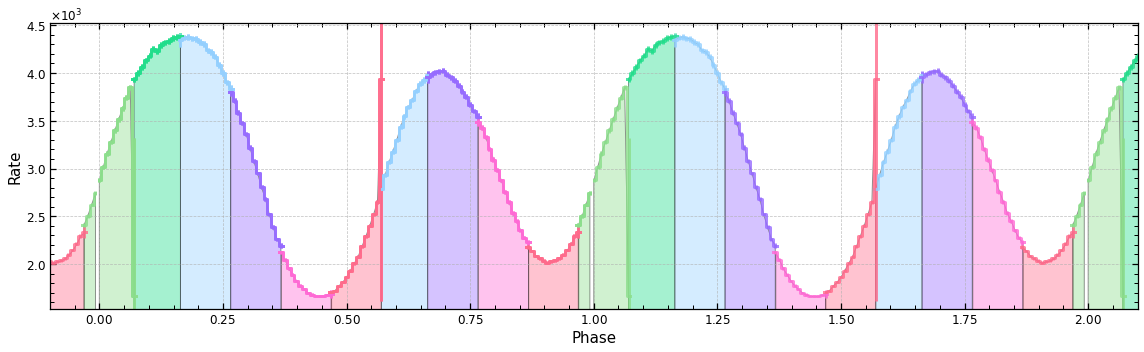

In [15]:
efolds = propname_per_bin(modes = ['AB'], postfix='lc_bary_nphase_128.efold')
nu_obs.plot_efolds_of_bins(efolds_files=efolds,prodpath=prodpath_ph_res,);

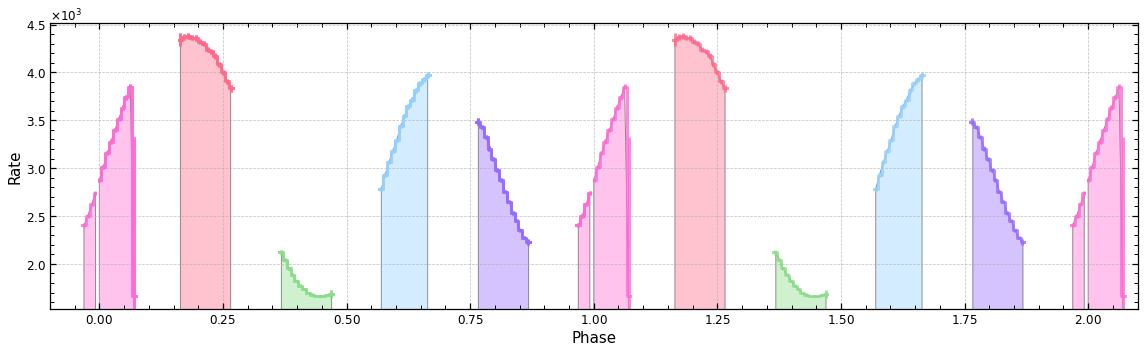

In [16]:
nu_obs.plot_efolds_of_bins(efolds_files=
    ['phase_resolved_bin1AB_sr.lc_bary_nphase_128.efold', 'phase_resolved_bin3AB_sr.lc_bary_nphase_128.efold', 'phase_resolved_bin5AB_sr.lc_bary_nphase_128.efold', 'phase_resolved_bin7AB_sr.lc_bary_nphase_128.efold', 'phase_resolved_bin9AB_sr.lc_bary_nphase_128.efold'],
    prodpath=prodpath_ph_res,save=False);

-----

### Spectral grouping

Finally,
1. Run the cell below to produce `grppha.sh` script which groups the spectra of each phase bin. 

In [17]:
from nustar_scripts.nu_utils import reduce_list
os.system('rm -f grppha.sh') #remove is exists!
spe_files =  reduce_list(propname_per_bin(['A','B'], postfix = 'pha'))
nu_obs.grppha(infiles=spe_files, prodpath=prodpath_ph_res, group_min=25)


Writing to file:  grppha.sh
Writing to file:  grppha.sh
Writing to file:  grppha.sh
Writing to file:  grppha.sh
Writing to file:  grppha.sh
Writing to file:  grppha.sh
Writing to file:  grppha.sh
Writing to file:  grppha.sh
Writing to file:  grppha.sh
Writing to file:  grppha.sh
Writing to file:  grppha.sh
Writing to file:  grppha.sh
Writing to file:  grppha.sh
Writing to file:  grppha.sh
Writing to file:  grppha.sh
Writing to file:  grppha.sh
Writing to file:  grppha.sh
Writing to file:  grppha.sh
Writing to file:  grppha.sh
Writing to file:  grppha.sh


2. Run `grppha.sh` to group the spectra of each phase bin.

Now all `*.pi` files are ready for further phase-resolved analysis in Xspec.